## Libraries and Credentials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "00fc92ea96f24b10a69e2191cb71f518"
client_secret = "1dbe9ba8369f45848d2646775ba7ed10"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Getting the Tracks

In [2]:
day6_uri = '5TnQc2N1iKlFjYD7CPGvFc'
results = sp.artist_albums(day6_uri, country='US')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

In [3]:
for album in albums:
    print((album['name'], album['id']))

('The Book of Us : The Demon', '3JX0hnu8b55RtbtEdUSYor')
('The Book of Us : Entropy', '2vnlVtSs6PP1iKvcTWtX2h')
('Remember Us : Youth Part 2', '5lJXj9X4Yl52xJq1sQzQB9')
('UNLOCK', '7INgr1F8dMMZyD7SEyq6E5')
('MOONRISE', '4cIBNWCiJdOupf3cjuKpvG')
('SUNRISE', '4B2Ijqpz9hRDqWraaDxLSS')
('THE BEST DAY2', '1LDHf4VNXPeb7Q99QznE4h')
('Finale', '1yRQOr658owkGnbMtzZevR')
('The Book of Us : Gravity', '6Bhc2M8Jn0CcMnzpAuKS85')
('Want More 19 Part.1', '1DDc6qbKF8Utom7maoljP5')
('Breaking Down', '3JQkWHPS8qKzeAHCLLgEsl')
('Beautiful Feeling', '5BbBHTqvPRVYWMbzuBh3kV')
('Stop The Rain', '1LETvU0oa4EXINhQW0JsMo')
('Shoot Me : Youth Part 1', '7cAFD2IBjYXaZr2bZdTTIf')
('Every DAY6 November', '2Fb3bl3BZrJjS7N1f5XwjB')
('Every DAY6 October', '6i7KFBDVzYFXmzmyA5kXCg')
('Every DAY6 September', '0WzV03OvcIgyLWVWLxcVBE')
('Every DAY6 August', '6kg4zSNrY3iN0WcTyIalE8')
('Every DAY6 July', '6znFqKiS4VSCRhvVjLDxMH')
('Every DAY6 May', '7kvo24MHQq4XWZEup6ZNGD')
('Every DAY6 April', '3zoVy27i5TxPrbYKmuCX7M')
('Eve

#### I only used some of the albums because many of the albums listed above have repeated songs or are just singles (for example MOONRISE and SUNRISE together contain all of the singles and b-sides from the 'Every DAY6 releases').

In [4]:
wanted_ids = ['3JX0hnu8b55RtbtEdUSYor', '2vnlVtSs6PP1iKvcTWtX2h', '5lJXj9X4Yl52xJq1sQzQB9', '7INgr1F8dMMZyD7SEyq6E5',
              '4cIBNWCiJdOupf3cjuKpvG', '4B2Ijqpz9hRDqWraaDxLSS', '1LDHf4VNXPeb7Q99QznE4h', '6Bhc2M8Jn0CcMnzpAuKS85', 
             '1DDc6qbKF8Utom7maoljP5', '7cAFD2IBjYXaZr2bZdTTIf', '6FShBZFJ2H6OEIXOrhcX6L', '2GQCh43InxGIbT0h2GnXWs']

In [5]:
import time
import re
all_songs = []
data = []
offset = 0
for album in albums:
    if album['id'] in wanted_ids:
        album_songs = sp.album_tracks(album['id'], limit=50, offset=offset)
        all_songs.extend(album_songs['items'])
        for track in album_songs['items']:
            trackname = track['name']
            data.append([trackname, album['name'], track["id"]])

In [6]:
data

[['Day and Night', 'The Book of Us : The Demon', '5Ld7wZn4IYCVa4sgsAB9Ft'],
 ['Zombie', 'The Book of Us : The Demon', '4s0dJmVknlUl7V6oK3puzZ'],
 ['Tick Tock', 'The Book of Us : The Demon', '4SYo5SpfduhCqibT8XUHaJ'],
 ['Love me or Leave me',
  'The Book of Us : The Demon',
  '7F9HWeJf4BTUzpj3B0CQKT'],
 ['STOP', 'The Book of Us : The Demon', '2kEXwegoUocARVri2uvgVH'],
 ['1 to 10', 'The Book of Us : The Demon', '5rzsyz15ulv7yJykUxRJrj'],
 ['Afraid', 'The Book of Us : The Demon', '4IIzisEAQJ0pDkvHChn9O4'],
 ['Zombie - English Ver.',
  'The Book of Us : The Demon',
  '3h34cQPPddk4x9cluPIAvv'],
 ['Deep in love', 'The Book of Us : Entropy', '0DzB1tFmtrW5PU8tX9XijW'],
 ['Sweet Chaos', 'The Book of Us : Entropy', '499qjESUqiZjlNI7XQhyLp'],
 ['EMERGENCY', 'The Book of Us : Entropy', '1PgLKKfGEgqjL4DfEQArEs'],
 ['Rescue Me', 'The Book of Us : Entropy', '53w7MjgFXt1GvAArGseZ1x'],
 ['365247', 'The Book of Us : Entropy', '6y722oXVv5JxS8aUuogxV5'],
 ['About Now', 'The Book of Us : Entropy', '59SpSJI

In [7]:
data = [song for song in data if 'ver.' not in song[0].lower()]

In [8]:
data = [song for song in data if song[0] != 'Chocolate - Instrumental']

In [9]:
data

[['Day and Night', 'The Book of Us : The Demon', '5Ld7wZn4IYCVa4sgsAB9Ft'],
 ['Zombie', 'The Book of Us : The Demon', '4s0dJmVknlUl7V6oK3puzZ'],
 ['Tick Tock', 'The Book of Us : The Demon', '4SYo5SpfduhCqibT8XUHaJ'],
 ['Love me or Leave me',
  'The Book of Us : The Demon',
  '7F9HWeJf4BTUzpj3B0CQKT'],
 ['STOP', 'The Book of Us : The Demon', '2kEXwegoUocARVri2uvgVH'],
 ['1 to 10', 'The Book of Us : The Demon', '5rzsyz15ulv7yJykUxRJrj'],
 ['Afraid', 'The Book of Us : The Demon', '4IIzisEAQJ0pDkvHChn9O4'],
 ['Deep in love', 'The Book of Us : Entropy', '0DzB1tFmtrW5PU8tX9XijW'],
 ['Sweet Chaos', 'The Book of Us : Entropy', '499qjESUqiZjlNI7XQhyLp'],
 ['EMERGENCY', 'The Book of Us : Entropy', '1PgLKKfGEgqjL4DfEQArEs'],
 ['Rescue Me', 'The Book of Us : Entropy', '53w7MjgFXt1GvAArGseZ1x'],
 ['365247', 'The Book of Us : Entropy', '6y722oXVv5JxS8aUuogxV5'],
 ['About Now', 'The Book of Us : Entropy', '59SpSJIhUabBPX5iseriso'],
 ['OUCH', 'The Book of Us : Entropy', '3YftGIMRfazVINtT3mcM3k'],
 ['N

In [10]:
import pandas as pd
featsToGet = {"danceability", "energy", "key", "loudness","mode",
    "speechiness","acousticness","instrumentalness","liveness","valence","tempo",
    "duration_ms","time_signature"}
featToIdx = {feat:i+len(data[0]) for i,feat in enumerate(featsToGet)}
newData = []
N = len(data)
for name, album, id_num in data:
    features = {}
    try:
        features = sp.audio_features(id_num)[0]
    except spotipy.client.SpotifyException:
        print(f"Unable to get features for song:{name}")
        continue
    row = [""] * (4 + len(featsToGet))
    row[0:4] = [name, album, id_num]
    for key, feat in features.items():
        if key in featsToGet:
            row[featToIdx[key]] = feat
    newData.append(row)
columns = ["name", "album", "id"]
columns.extend(list(featsToGet))
df = pd.DataFrame(newData, columns=columns)

In [11]:
df

,name,album,id,acousticness,valence,tempo,energy,time_signature,loudness,instrumentalness,liveness,key,speechiness,danceability,duration_ms,mode
0,Day and Night,The Book of Us : The Demon,5Ld7wZn4IYCVa4sgsAB9Ft,0.20900,0.565,101.467,0.860,4,-3.375,0.000000,0.1860,9,0.1090,0.471,204998,1
1,Zombie,The Book of Us : The Demon,4s0dJmVknlUl7V6oK3puzZ,0.01170,0.527,121.982,0.542,4,-4.119,0.000000,0.0818,0,0.0438,0.790,209259,1
2,Tick Tock,The Book of Us : The Demon,4SYo5SpfduhCqibT8XUHaJ,0.15900,0.512,144.032,0.623,4,-4.451,0.000000,0.2340,4,0.0336,0.720,233400,1
3,Love me or Leave me,The Book of Us : The Demon,7F9HWeJf4BTUzpj3B0CQKT,0.00085,0.580,126.012,0.899,4,-3.364,0.000000,0.1240,6,0.0328,0.618,222765,0
4,STOP,The Book of Us : The Demon,2kEXwegoUocARVri2uvgVH,0.00302,0.666,112.051,0.940,4,-2.925,0.000002,0.3440,9,0.0484,0.665,228003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,이상하게 계속 이래 Out Of My Mind,The Day,7sL5S3vR1x1B2a0QrJsiVH,0.18700,0.530,123.983,0.789,4,-5.161,0.000000,0.1280,5,0.0340,0.712,191453,1
83,Congratulations,The Day,5dhZMPumW81ipov9bpz6nu,0.04600,0.577,179.802,0.703,4,-4.077,0.000000,0.0395,3,0.0535,0.321,229293,1
84,버릇이 됐어 Habits,The Day,20As0IgGbKdpGfEvBtZOF0,0.16900,0.787,98.004,0.818,4,-3.492,0.000000,0.3300,1,0.1420,0.421,206440,1
85,태양처럼 Like That Sun,The Day,1y95XZn6VgvAQRm7GeAKUI,0.00561,0.903,104.961,0.661,4,-4.586,0.000000,0.0647,8,0.0667,0.756,218453,1


In [12]:
df.to_csv('day6.csv')

## Exploratory Data Analysis

In [13]:
#summary statistics for numerical values
df.describe()

,acousticness,valence,tempo,energy,time_signature,loudness,instrumentalness,liveness,key,speechiness,danceability,duration_ms,mode
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.091151,0.514379,140.677609,0.784793,3.942529,-3.374276,0.000009,0.185949,5.103448,0.067040,0.540080,213739.563218,0.678161
std,0.147566,0.189662,30.971920,0.152899,0.234090,1.437303,0.000054,0.136467,3.537291,0.058405,0.130947,22212.358759,0.469890
min,0.000085,0.116000,75.704000,0.168000,3.000000,-10.482000,0.000000,0.030100,0.000000,0.025200,0.218000,173419.000000,0.000000
25%,0.005595,0.372000,115.532000,0.704000,4.000000,-4.029000,0.000000,0.090550,2.000000,0.034300,0.455000,197701.000000,0.000000
50%,0.035200,0.512000,140.106000,0.818000,4.000000,-3.364000,0.000000,0.128000,5.000000,0.044000,0.542000,209040.000000,1.000000
75%,0.115000,0.642000,169.916500,0.898500,4.000000,-2.501500,0.000000,0.257000,8.000000,0.071400,0.623500,227044.500000,1.000000
max,0.866000,0.944000,200.171000,0.980000,4.000000,-0.712000,0.000476,0.655000,11.000000,0.370000,0.812000,283160.000000,1.000000


In [14]:
#Looking at average characteristics for each album (along with a single they made for an OST)
df.groupby('album').mean()

,acousticness,valence,tempo,energy,time_signature,loudness,instrumentalness,liveness,key,speechiness,danceability,duration_ms,mode
album,,,,,,,,,,,,,
DAYDREAM,0.059879,0.457167,133.167833,0.757667,3.833333,-4.081167,5.266667e-07,0.198067,5.333333,0.051250,0.571500,216975.166667,0.666667
MOONRISE,0.172178,0.377077,138.892231,0.679615,3.923077,-4.179923,0.000000e+00,0.230062,4.230769,0.037754,0.513231,224199.538462,0.769231
Remember Us : Youth Part 2,0.155337,0.525714,150.717143,0.759429,4.000000,-3.820714,0.000000e+00,0.173914,5.857143,0.071786,0.571429,205906.571429,0.571429
SUNRISE,0.054833,0.460250,158.460500,0.772833,3.833333,-3.209833,7.691667e-07,0.126642,4.750000,0.064083,0.441333,213809.416667,0.666667
Shoot Me : Youth Part 1,0.109233,0.592167,153.843833,0.881500,4.000000,-2.110333,0.000000e+00,0.168817,3.333333,0.095517,0.520333,209014.333333,0.666667
THE BEST DAY2,0.024140,0.489500,155.680000,0.901500,3.500000,-3.280500,2.380000e-04,0.191400,9.500000,0.176750,0.429500,193681.000000,0.500000
The Book of Us : Entropy,0.069202,0.592818,141.901364,0.784091,4.000000,-3.367818,2.006545e-05,0.190245,5.000000,0.089436,0.609455,204093.727273,0.636364
The Book of Us : Gravity,0.115115,0.581333,139.003833,0.810333,4.000000,-2.793167,2.650000e-07,0.208417,6.166667,0.058700,0.570833,210227.666667,0.500000
The Book of Us : The Demon,0.063630,0.499714,125.638429,0.783286,4.000000,-3.675714,2.514286e-07,0.161414,6.428571,0.048514,0.628286,214215.428571,0.571429


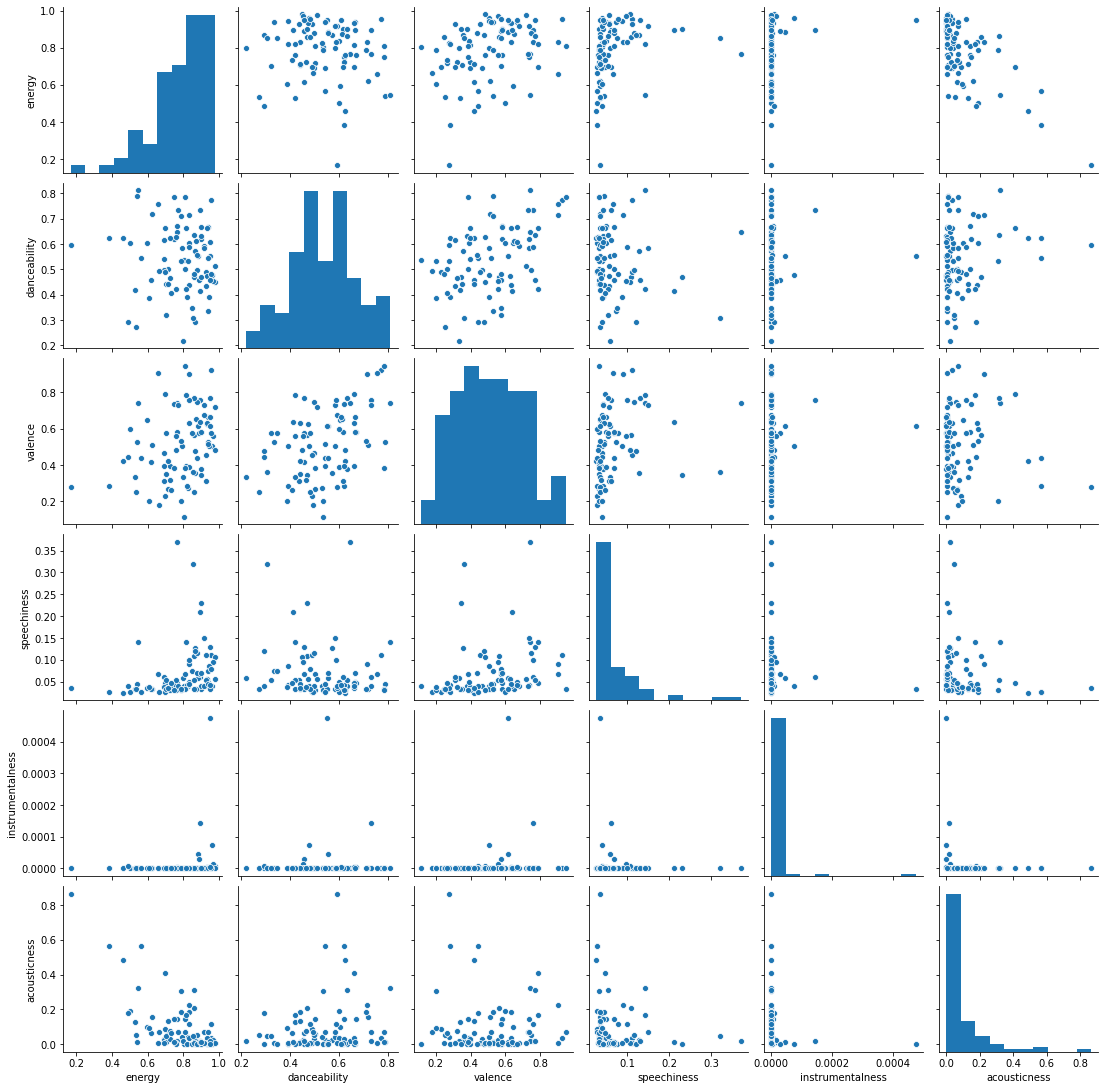

In [15]:
sns.pairplot(df[['energy', 'danceability', 'valence', 'speechiness', 'instrumentalness', 'acousticness']])

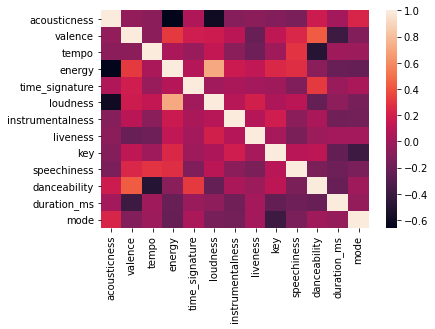

In [16]:
sns.heatmap(df.corr())

In [17]:
#The pairplot and heatmap show that there are both positive and negative relationships between
#some of the characteristics, such as the negative relationship between acousticness and energy/loudness
#and the positive relationships between energy, loudness, valence, and danceability.

## Let's try some K-Means Clustering!
### How can we group the songs based on these features?

In [18]:
columns_of_interest = ['danceability', 'valence', 'acousticness', 'speechiness', 'energy', 'tempo', 'loudness']
data = df[columns_of_interest]

In [19]:
from sklearn.preprocessing import MinMaxScaler
X2 = MinMaxScaler().fit_transform(data)

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
K = range(3,10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state = 12)
    model = k_means.fit(X2)
    labels = k_means.labels_
    silhouette = metrics.silhouette_score(X2, labels, metric = 'euclidean')
    cv = metrics.calinski_harabasz_score(X2, labels)
    print("Clusters: {} \t Silhouette Score: {} \t CV Score: {}".format(k, silhouette, cv))

Clusters: 3 	 Silhouette Score: 0.25146218602175663 	 CV Score: 28.286445061975822
Clusters: 4 	 Silhouette Score: 0.26057574489769325 	 CV Score: 26.83390557391116
Clusters: 5 	 Silhouette Score: 0.23755576256870767 	 CV Score: 27.881334787616254
Clusters: 6 	 Silhouette Score: 0.24436339271013147 	 CV Score: 26.373832747224274
Clusters: 7 	 Silhouette Score: 0.23569196978668136 	 CV Score: 26.13210157424829
Clusters: 8 	 Silhouette Score: 0.22473263966170023 	 CV Score: 24.370259300561123
Clusters: 9 	 Silhouette Score: 0.2290651980314058 	 CV Score: 23.721627922322646


In [21]:
n = 4

k_means = KMeans(n_clusters=n, random_state = 12)
k_means.fit(X2)
k_labels = k_means.labels_

k_labels = k_means.predict(X2)

df['k_means_cluster'] = pd.Series(k_labels)
print(df['k_means_cluster'].value_counts())

for i in range(n):
    print("Cluster {}:".format(i))
    print(df[['name', 'album']][df['k_means_cluster'] == i])

2    44
3    19
1    19
0     5
Name: k_means_cluster, dtype: int64
Cluster 0:
               name                       album
12        About Now    The Book of Us : Entropy
18   아픈 길 hurt road  Remember Us : Youth Part 2
44    혼자야 All Alone                    MOONRISE
47  노력해볼게요 I'll try                    MOONRISE
66            Cover    The Book of Us : Gravity
Cluster 1:
                       name                       album
6                    Afraid  The Book of Us : The Demon
14                 Not Fine    The Book of Us : Entropy
17      Like a flowing wind    The Book of Us : Entropy
24        Beautiful Feeling  Remember Us : Youth Part 2
32                  Falling                      UNLOCK
35            Better Better                    MOONRISE
36         좋아합니다 I like you                    MOONRISE
38       남겨둘게 I'll remember                    MOONRISE
39            놀래! Whatever!                    MOONRISE
45             쏟아진다 Pouring                    MOONRISE
46  누군

In [22]:
labels = ['valence',
 'energy',
 'speechiness',
 'acousticness',
 'danceability',
 'tempo', 'acousticness']

In [23]:
df.head()

,name,album,id,acousticness,valence,tempo,energy,time_signature,loudness,instrumentalness,liveness,key,speechiness,danceability,duration_ms,mode,k_means_cluster
0,Day and Night,The Book of Us : The Demon,5Ld7wZn4IYCVa4sgsAB9Ft,0.20900,0.565,101.467,0.860,4,-3.375,0.000000,0.1860,9,0.1090,0.471,204998,1,2
1,Zombie,The Book of Us : The Demon,4s0dJmVknlUl7V6oK3puzZ,0.01170,0.527,121.982,0.542,4,-4.119,0.000000,0.0818,0,0.0438,0.790,209259,1,2
2,Tick Tock,The Book of Us : The Demon,4SYo5SpfduhCqibT8XUHaJ,0.15900,0.512,144.032,0.623,4,-4.451,0.000000,0.2340,4,0.0336,0.720,233400,1,2
3,Love me or Leave me,The Book of Us : The Demon,7F9HWeJf4BTUzpj3B0CQKT,0.00085,0.580,126.012,0.899,4,-3.364,0.000000,0.1240,6,0.0328,0.618,222765,0,2
4,STOP,The Book of Us : The Demon,2kEXwegoUocARVri2uvgVH,0.00302,0.666,112.051,0.940,4,-2.925,0.000002,0.3440,9,0.0484,0.665,228003,0,2


#### So now we have four different clusters to group the songs. What are some of the most distinctive features of each cluster?

In [29]:
df.groupby('k_means_cluster').mean()

,acousticness,valence,tempo,energy,time_signature,loudness,instrumentalness,liveness,key,speechiness,danceability,duration_ms,mode,pca_0,pca_1
k_means_cluster,,,,,,,,,,,,,,,
0,0.561400,0.433000,137.980800,0.424600,4.000000,-6.646200,0.000000e+00,0.155680,2.200000,0.051080,0.639400,216569.200000,1.000000,-0.320482,0.602532
1,0.056715,0.327158,161.290421,0.713421,3.894737,-3.717632,4.857895e-07,0.196184,4.578947,0.041011,0.430684,225083.105263,0.736842,0.258155,0.227344
2,0.078590,0.576955,117.191477,0.807955,3.954545,-3.324091,1.718636e-05,0.200355,5.386364,0.052398,0.617250,211716.522727,0.681818,-0.224538,-0.076471
3,0.030926,0.578105,175.163421,0.897316,3.947368,-2.286105,2.793158e-06,0.150321,5.736842,0.131179,0.444632,206336.315789,0.526316,0.346165,-0.208814


#### Cool radar plots to display the distinctive features of each cluster

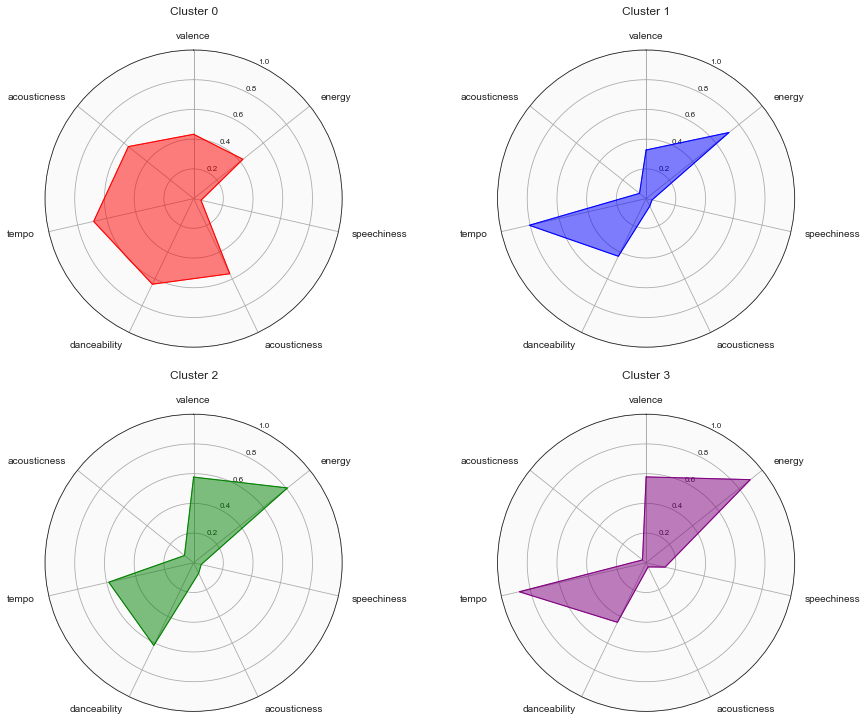

In [32]:
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(13, 10))
plt.tight_layout(h_pad = 3, w_pad = 3)

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

colors = ['red', 'blue', 'green', 'purple']
ax_order = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]

def draw_radar_plot(cluster, color, ax):
    values = [np.mean(df[column][df['k_means_cluster']==cluster]) for column in labels]
    #squash the 'tempo' value to fit the 0-1 range: the max is about 200
    values[labels.index('tempo')] = values[labels.index('tempo')]/200
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=cluster)
    ax.fill(angles, values, color=color, alpha=0.5)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), labels)
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    ax.set_ylim(0, 1)
    ax.set_rlabel_position(180 / num_vars)
    ax.tick_params(colors='#222222')         # color of tick labels
    ax.tick_params(axis='y', labelsize=8)    # y-axis labels
    ax.grid(color='#AAAAAA')                 # color of circular gridlines
    ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
    ax.set_facecolor('#FAFAFA')
    ax.set_title('Cluster {}'.format(cluster), pad=20)# background color inside the circle itself
    
for i in range(4):
    draw_radar_plot(i, colors[i], ax_order[i])
    
plt.savefig('day6_cluster.png')

#### Now let's take a look at the clusters on a graph using Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X2)
df[['pca_0', 'pca_1']] = pd.DataFrame(pca.transform(X2))

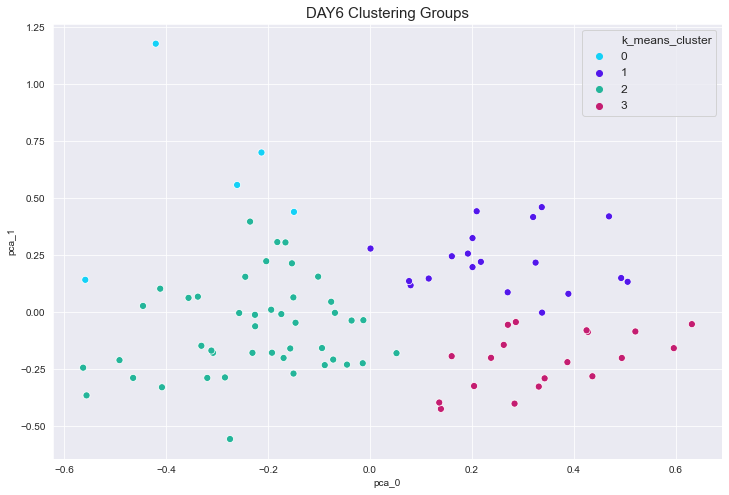

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'pca_0', y = 'pca_1', data = df, hue = 'k_means_cluster', 
                palette = sns.color_palette(['#14d1f7', '#5317eb', '#24b59a', '#c41d71']), s=50)
plt.legend(fontsize=12)
plt.title('DAY6 Clustering Groups', fontsize=15)
plt.savefig('day6_pca.png')

In [27]:
#what song represents the really high light blue point?
df[df['pca_1'] == max(df['pca_1'])]

,name,album,id,acousticness,valence,tempo,energy,time_signature,loudness,instrumentalness,liveness,key,speechiness,danceability,duration_ms,mode,k_means_cluster,pca_0,pca_1
47,노력해볼게요 I'll try,MOONRISE,5KFtE7lYdWaU5ukGOE7TMv,0.866,0.277,136.027,0.168,4,-10.482,0.0,0.104,7,0.0351,0.594,223169,1,0,-0.420543,1.176151
